In [53]:
import pandas as pd
import numpy as np

In [54]:
df=pd.read_csv('/content/spam.csv', encoding='latin-1')

In [55]:
df.shape

(5572, 5)

In [56]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [58]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [59]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [60]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [62]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
df.isnull().sum()

,0
target,0
text,0


In [64]:
df.duplicated().sum()

403

In [65]:
print("before removing duplicates;",df.shape)
df.drop_duplicates(keep='first',inplace=True)
print("after removing duplicates",df.shape)

before removing duplicates; (5572, 2)
after removing duplicates (5169, 2)


<Axes: xlabel='target'>

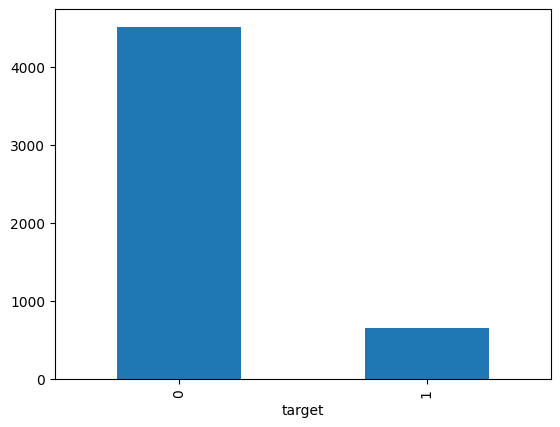

In [66]:
df['target'].value_counts().plot(kind='bar')

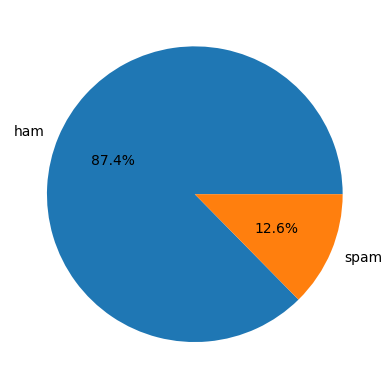

In [67]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.show()

In [68]:
import nltk

In [69]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [70]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [71]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [72]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [73]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


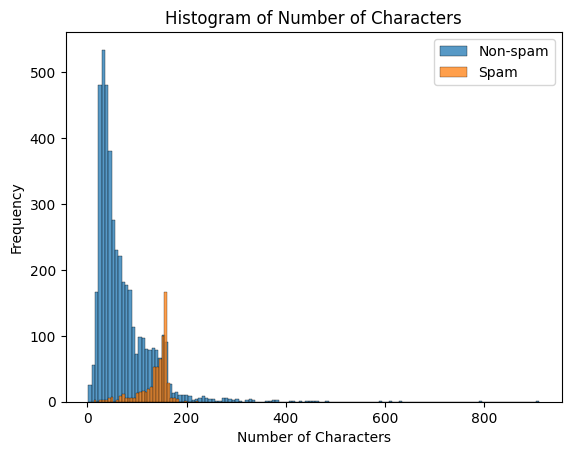

In [74]:
import seaborn as sns
sns.histplot(df[df['target'] == 0]['num_characters'], label='Non-spam')
sns.histplot(df[df['target'] == 1]['num_characters'], label='Spam')

plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Characters')

plt.legend()

plt.show()

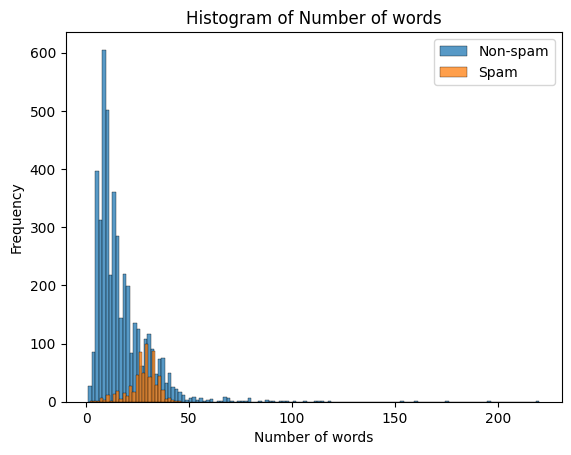

In [75]:
sns.histplot(df[df['target'] == 0]['num_words'], label='Non-spam')
sns.histplot(df[df['target'] == 1]['num_words'], label='Spam')

plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of words')

plt.legend()

plt.show()

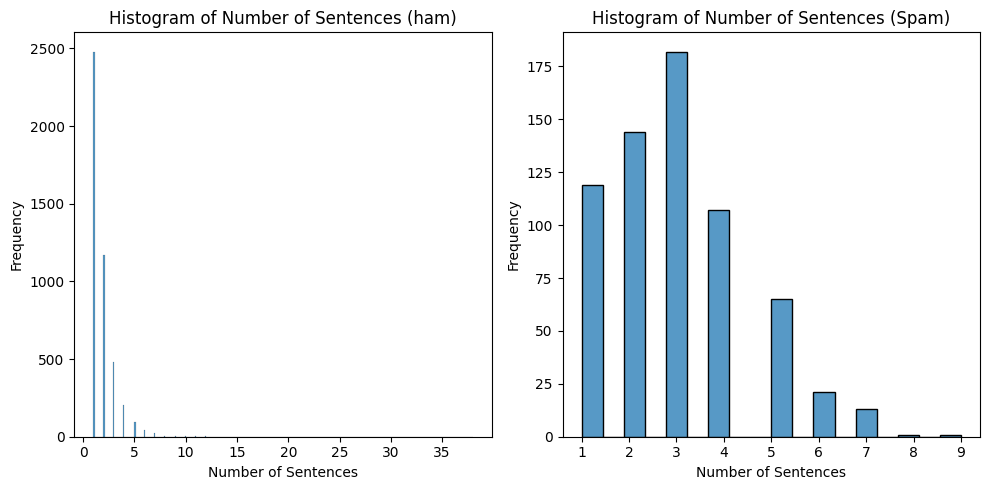

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for non-spam messages
sns.histplot(df[df['target'] == 0]['num_sentences'], ax=axes[0])
axes[0].set_xlabel('Number of Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Number of Sentences (ham)')

# Plot for spam messages
sns.histplot(df[df['target'] == 1]['num_sentences'], ax=axes[1])
axes[1].set_xlabel('Number of Sentences')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Number of Sentences (Spam)')

plt.tight_layout()
plt.show()

In [77]:
df.corr(numeric_only=True)

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

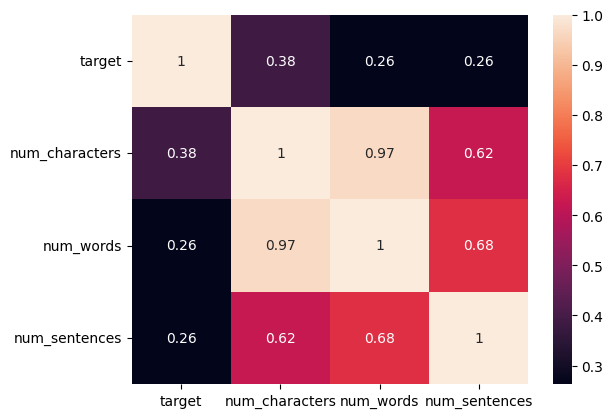

In [78]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [79]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def transform_text(text):
    text = text.lower()

    text = nltk.word_tokenize(text)

    filtered_words = []

    for word in text:
        if word.isalnum():
            filtered_words.append(word)
            text = filtered_words[:]

    filtered_words.clear()

    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            filtered_words.append(word)

    text = filtered_words[:]

    filtered_words.clear()

    stemmer = PorterStemmer()
    for word in text:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

    transformed_text = " ".join(filtered_words)

    return transformed_text

In [80]:
df['transformed_text'] = df['text'].apply(transform_text)


In [81]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [82]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

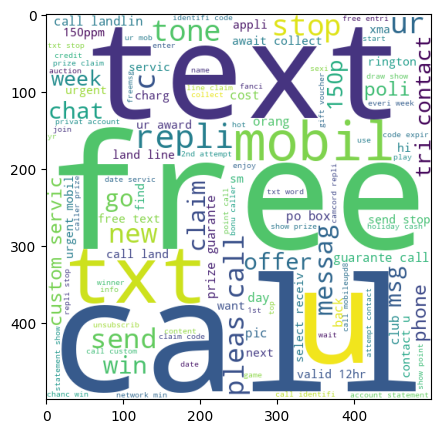

In [83]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.imshow(spam_wc)
plt.show()

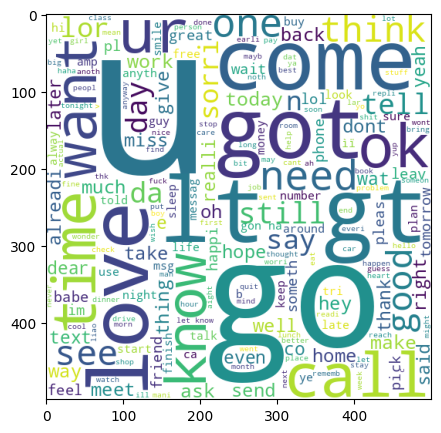

In [84]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.imshow(ham_wc)
plt.show()


In [85]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [86]:
ham_frequncy = []
for msg in df[df['target'] == 0]['transformed_text'].to_list():
    for word in msg.split():
        ham_frequncy.append(word)

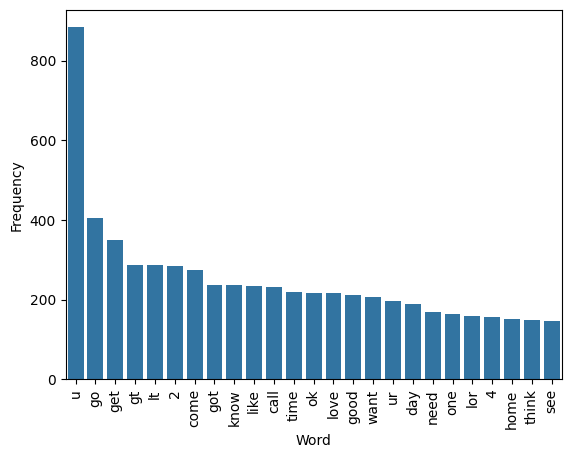

In [87]:
from collections import Counter
# Count the frequency of each word in the ham_frequncy list
word_frequency = Counter(ham_frequncy)

# Retrieve the 25 most common words along with their frequencies
most_common_words = word_frequency.most_common(25)

# Create a dataframe from the most_common_words list
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the bar plot
sns.barplot(data=df_most_common, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()

In [88]:
spam_frequncy = []  # Create an empty list to store the words from ham messages
# Iterate over each message in the transformed_text column of ham messages
for msg in df[df['target'] == 1]['transformed_text'].to_list():
    # Split the message into individual words
    for word in msg.split():
        # Append each word to the ham_frequncy list
        spam_frequncy.append(word)

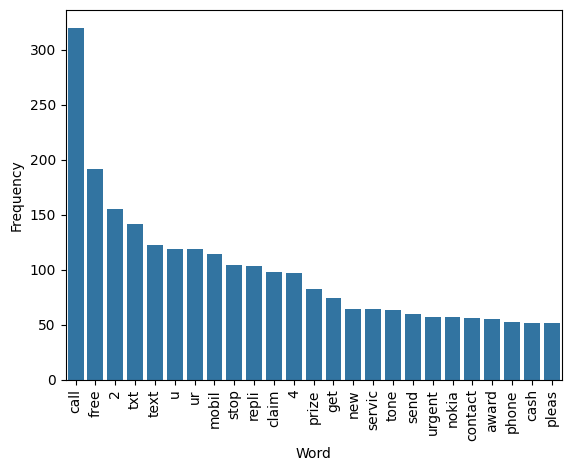

In [89]:
word_frequency = Counter(spam_frequncy)

# Retrieve the 25 most common words along with their frequencies
most_common_words_spam = word_frequency.most_common(25)

# Create a dataframe from the most_common_words list
df_most_common_spam = pd.DataFrame(most_common_words_spam, columns=['Word', 'Frequency'])

# Plot the bar plot
sns.barplot(data=df_most_common_spam, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [91]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [92]:
X.shape

(5169, 6715)

In [93]:
y = df['target'].values

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [96]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [97]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()
# Create a Multinomial Naive Bayes classifier
mnb = MultinomialNB()
# Create a Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

In [98]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [99]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [100]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [102]:
# Perform TF-IDF vectorization on the 'transformed_text' column of the dataframe
X = tfidf.fit_transform(df['transformed_text']).toarray()
# Create a variable 'y' containing the values of the 'target' column
y = df['target'].values

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [104]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[787 109]
 [ 25 113]]
0.509009009009009


In [105]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [106]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [107]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [108]:
svc = SVC(kernel='sigmoid', gamma=1.0)  # Support Vector Classifier with sigmoid kernel
knc = KNeighborsClassifier()  # K-Nearest Neighbors Classifier
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)  # Decision Tree Classifier with maximum depth of 5
lrc = LogisticRegression(solver='liblinear', penalty='l1')  # Logistic Regression Classifier with L1 regularization
rfc = RandomForestClassifier(n_estimators=50, random_state=2)  # Random Forest Classifier with 50 decision trees
abc = AdaBoostClassifier(n_estimators=50, random_state=2)  # AdaBoost Classifier with 50 weak learners
bc = BaggingClassifier(n_estimators=50, random_state=2)  # Bagging Classifier with 50 base estimators
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)  # Extra Trees Classifier with 50 decision trees
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)  # Gradient Boosting Classifier with 50 boosting stages
xgb = XGBClassifier(n_estimators=50, random_state=2)  # XGBoost Classifier with 50 boosting rounds

In [109]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'DT': dtc,
    'NB': mnb,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [110]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    # Train the classifier model using the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate the accuracy score by comparing the predicted labels with the true labels
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the precision score by comparing the predicted labels with the true labels
    precision = precision_score(y_test, y_pred)

    # Return the accuracy and precision scores
    return accuracy, precision

In [111]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.975
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8217821782178217
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.971953578336557
Precision -  0.990990990990991


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9622823984526112
Precision -  0.9380530973451328
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.93
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [112]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores})

In [113]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.976789,0.975000
1,KN,0.905222,1.000000
2,DT,0.929400,0.821782
3,NB,0.971954,1.000000
4,LR,0.956480,0.969697
5,RF,0.971954,0.990991
6,AdaBoost,0.962282,0.938053
7,BgC,0.958414,0.868217
8,ETC,0.978723,0.975410
9,GBDT,0.949710,0.930000


In [114]:
performance_df = performance_df.sort_values('Precision', ascending=False)

In [115]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
3,NB,0.971954,1.000000
5,RF,0.971954,0.990991
8,ETC,0.978723,0.975410
0,SVC,0.976789,0.975000
4,LR,0.956480,0.969697
6,AdaBoost,0.962282,0.938053
10,xgb,0.967118,0.933333
9,GBDT,0.949710,0.930000
7,BgC,0.958414,0.868217
